Import Packages and Read Data

In [0]:
from csv import reader
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
os.environ['PYSPARK_PYTHON'] = 'python3'
import urllib.request
urllib.request.urlretrieve('https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD', '/tmp/myxxx.csv')
dbutils.fs.mv('file:/tmp/myxxx.csv', 'dbfs:/data/sf_03_18.csv')
data_path = 'dbfs:/data/sf_03_18.csv'

In [0]:
spark = SparkSession.builder.appName('crime analysis').config('spark.some.config.option', 'some-value').getOrCreate()
df = spark.read.format('csv').option('header','true').load(data_path)
display(df)
df.createOrReplaceTempView('sf_crime')

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
4018830907041,040188309,07041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
13605159706372,136051597,06372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),32,1,10,20,8,2,9,28853,19,null,null,null,null,null,null,2,null,null,null,null,32
13618826906244,136188269,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),null,3,5,20,8,4,5,28853,19,null,null,null,3,null,null,2,null,null,3,null,null
4098938926105,040989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),49,7,8,38,1,5,4,59,38,null,null,null,null,null,null,1,null,null,null,null,49
5085058207021,050850582,07021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),66,9,1,28,9,7,6,28861,25,null,null,null,null,null,null,2,null,null,null,null,66
13085582009320,130855820,09320,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),13,8,6,18,15,5,1,54,16,null,null,null,null,null,null,1,null,null,null,null,13
11091687865016,110916878,65016,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,1,null,null,null,null,86
5116515606241,051165156,06241,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),103,4,11,15,15,6,11,29490,13,null,null,null,null,null,null,2,null,null,null,null,103
5099200968020,050992009,68020,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),109,10,8,14,1,8,4,56,12,null,null,null,null,null,null,1,null,null,null,null,109
9118446702004,091184467,02004,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),20,5,10,36,5,10,9,28852,36,null,null,null,null,null,null,2,1,1,null,null,20


Find the number of crimes for each category

In [0]:
query = spark.sql('SELECT category, COUNT(*) AS num_crimes FROM sf_crime GROUP BY category ORDER BY num_crimes DESC')
display(query)

category,num_crimes
LARCENY/THEFT,477975
OTHER OFFENSES,303027
NON-CRIMINAL,236937
ASSAULT,191384
VEHICLE THEFT,126228
DRUG/NARCOTIC,117875
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79740


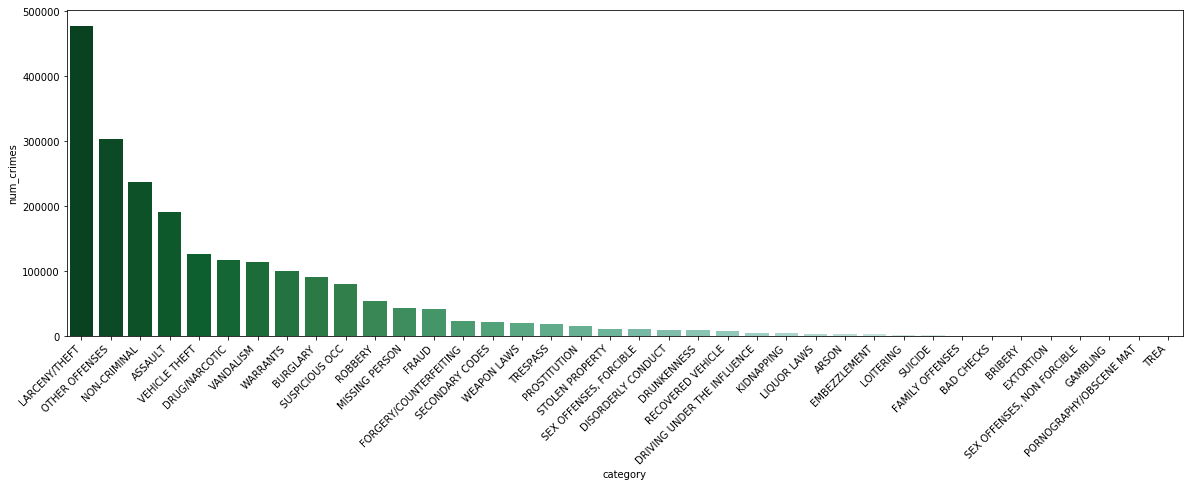

In [0]:
dims = (20,6)
fig = plt.subplots(figsize = dims)
query_plot = query.toPandas()
chart = sns.barplot(x = 'category', y = 'num_crimes', palette = 'BuGn_r', data = query_plot)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

Find the number of crimes for each district

In [0]:
query = spark.sql('SELECT PdDistrict, COUNT(*) AS num_crimes FROM sf_crime GROUP BY PdDistrict ORDER BY num_crimes DESC')
display(query)

PdDistrict,num_crimes
SOUTHERN,394234
MISSION,293072
NORTHERN,269229
CENTRAL,223962
BAYVIEW,210729
TENDERLOIN,189034
INGLESIDE,186645
TARAVAL,158710
PARK,121070
RICHMOND,114267


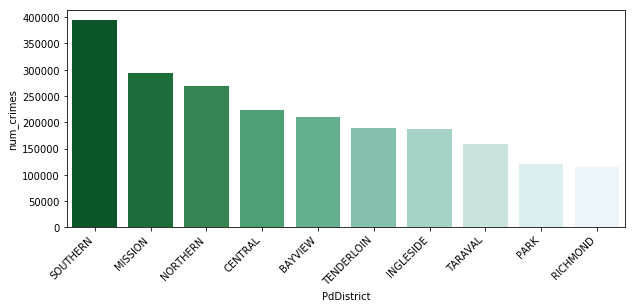

In [0]:
dims = (10,4)
fig = plt.subplots(figsize = dims)
query_plot = query.toPandas()
chart = sns.barplot(x = 'PdDistrict', y = 'num_crimes', palette = 'BuGn_r', data = query_plot)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

Find the number of crimes in downtown every Sunday

In [0]:
df_new = df[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_new)
df_new.createOrReplaceTempView('sf_crime')

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
040188309,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90)
136051597,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464)
136188269,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455)
040989389,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135)
050850582,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229)
130855820,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917)
110916878,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541)
051165156,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589)
050992009,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102)
091184467,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
df_new = df_new.withColumn('IncidentDate', to_date(df_new.Date, 'MM/dd/yyyy'))
df_new = df_new.withColumn('Month', month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
df_new.createOrReplaceTempView('sf_crime')
display(df_new)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
040188309,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,02/15/2004,02:00,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90,POINT (-120.50000000000001 90),2004-02-15,2,2004
136051597,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,03/14/2013,09:21,SOUTHERN,NONE,1300 Block of STEVENSON ST,-122.421594519119,37.7707674171464,POINT (-122.421594519119 37.7707674171464),2013-03-14,3,2013
136188269,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,10/08/2013,19:30,MISSION,NONE,VALENCIA ST / DUBOCE AV,-122.422367409563,37.7698682392455,POINT (-122.422367409563 37.7698682392455),2013-10-08,10,2013
040989389,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,08/29/2004,22:47,PARK,NONE,300 Block of WOODSIDE AV,-122.452716700987,37.7457451434135,POINT (-122.452716700987 37.7457451434135),2004-08-29,8,2004
050850582,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,07/29/2005,21:00,INGLESIDE,NONE,0 Block of RAE AV,-122.448127287476,37.7121636146229,POINT (-122.448127287476 37.7121636146229),2005-07-29,7,2005
130855820,FRAUD,"CREDIT CARD, THEFT BY USE OF",Tuesday,10/08/2013,21:11,PARK,NONE,2600 Block of GEARY BL,-122.446612978839,37.7822458223917,POINT (-122.44661297883898 37.7822458223917),2013-10-08,10,2013
110916878,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,11/13/2011,10:15,BAYVIEW,"ARREST, CITED",PHELPS ST / EVANS AV,-122.388456834121,37.7429830266541,POINT (-122.388456834121 37.7429830266541),2011-11-13,11,2011
051165156,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,10/15/2005,13:00,RICHMOND,NONE,DIVISADERO ST / SUTTER ST,-122.439874051516,37.7852471617589,POINT (-122.439874051516 37.7852471617589),2005-10-15,10,2005
050992009,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,09/03/2005,21:21,TARAVAL,NONE,1500 Block of 12TH AV,-122.469264894685,37.7592163037102,POINT (-122.469264894685 37.7592163037102),2005-09-03,9,2005
091184467,"SEX OFFENSES, FORCIBLE","FORCIBLE RAPE, BODILY FORCE",Monday,11/16/2009,12:49,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,500 Block of JONES ST,-122.412999075009,37.786277459166,POINT (-122.412999075009 37.786277459166),2009-11-16,11,2009


In [0]:
query = spark.sql("SELECT IncidentDate, DayOfWeek, COUNT(*) AS num_crimes FROM sf_crime WHERE DayOfWeek = 'Sunday' AND X > -122.4313 AND X < -122.4213 AND Y > 37.754 AND Y < 37.774 GROUP BY IncidentDate, DayOfWeek ORDER BY IncidentDate")
display(query)

IncidentDate,DayOfWeek,num_crimes
2003-01-05,Sunday,14
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,13
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


Find the number of crimes each month since 2015

In [0]:
query = spark.sql('SELECT Month, Year, COUNT(*) AS num_crimes FROM sf_crime GROUP BY Year, Month HAVING Year IN (2015, 2016, 2017, 2018) ORDER BY Year, Month')
display(query)

Month,Year,num_crimes
1,2015,13370
2,2015,12055
3,2015,13674
4,2015,12705
5,2015,13511
6,2015,13073
7,2015,13158
8,2015,13523
9,2015,12666
10,2015,12889


There has been a noticeable drop in crime since February 2018; when compared with numbers from corresponding months in previous years, the number of crimes dropped by 2000 every month

Analyze the amount of crime with respect to the hour on certain days

In [0]:
#total per hour across all days
query = spark.sql('SELECT SUBSTRING(Time, 1, 2) AS Hour, COUNT(*) AS num_crimes FROM sf_crime GROUP BY Hour ORDER BY Hour')
display(query)

Hour,num_crimes
00,111449
01,64426
02,53963
03,35271
04,24997
05,22178
06,32898
07,53103
08,79464
09,86795


In [0]:
#number of crimes by hour on christmas
query = spark.sql("SELECT SUBSTRING(Time, 1, 2) AS Hour, COUNT(*) AS num_crimes FROM sf_crime WHERE Date LIKE '12/25/%' GROUP BY Hour ORDER BY Hour")
display(query)

Hour,num_crimes
00,215
01,138
02,114
03,79
04,60
05,49
06,57
07,62
08,110
09,83


In [0]:
#crime by hour for new year and new year eve
query = spark.sql("SELECT SUBSTRING(Time, 1, 2) AS Hour, SUBSTRING(Date, 1, 5) AS DIY, COUNT(*) AS num_crimes FROM sf_crime WHERE Date LIKE '12/31/%' OR Date LIKE '01/01/%' GROUP BY DIY, Hour ORDER BY DIY DESC, Hour")
display(query)

Hour,DIY,num_crimes
00,12/31,286
01,12/31,162
02,12/31,138
03,12/31,72
04,12/31,58
05,12/31,59
06,12/31,72
07,12/31,98
08,12/31,179
09,12/31,173


Early in the morning (1 AM - 7 AM), crime is much less common
On Christmas, crimes are most common at lunch time and around midnight
Around new year, crime spikes significantly around midnight

Determine the most dangerous areas in SF

In [0]:
query = spark.sql('SELECT PdDistrict, COUNT(*) AS num_crimes FROM sf_crime GROUP BY PdDistrict ORDER BY num_crimes DESC LIMIT 3')
display(query)

PdDistrict,num_crimes
SOUTHERN,394234
MISSION,293072
NORTHERN,269229


The 3 most dangerous areas in SF are Southern, Mission, and Northern

Find the percentage of resolution for different categories of crimes

In [0]:
res = spark.sql('SELECT category, resolution, COUNT(*) AS num FROM sf_crime GROUP BY category, resolution')
res.createOrReplaceTempView('res')
cat = spark.sql('SELECT category, COUNT(*) AS num FROM sf_crime GROUP BY category')
cat.createOrReplaceTempView('cat')
query = spark.sql('SELECT DISTINCT sf_crime.category, sf_crime.resolution, res.num/cat.num AS Percentage FROM (sf_crime LEFT JOIN res ON sf_crime.category = res.category AND sf_crime.resolution = res.resolution) LEFT JOIN cat ON sf_crime.category = cat.category ORDER BY category, resolution')
query.createOrReplaceTempView('query_res')

In [0]:
#Resolutions for LARCENY/THEFT
query = spark.sql("SELECT Resolution, Percentage FROM query_res WHERE category = 'LARCENY/THEFT' ORDER BY Percentage DESC")
display(query)

Resolution,Percentage
NONE,0.9162131910664784
"ARREST, BOOKED",0.052588524504419684
"ARREST, CITED",0.021890266227313143
NOT PROSECUTED,0.0033474554108478475
UNFOUNDED,0.0025545269104032637
COMPLAINANT REFUSES TO PROSECUTE,9.854071865683352E-4
DISTRICT ATTORNEY REFUSES TO PROSECUTE,9.770385480412154E-4
EXCEPTIONAL CLEARANCE,9.247345572467179E-4
PROSECUTED BY OUTSIDE AGENCY,3.2637690255766513E-4
PSYCHOPATHIC CASE,9.833150269365553E-5


In [0]:
#Resolutions for BURGLARY
query = spark.sql("SELECT Resolution, Percentage FROM query_res WHERE category = 'BURGLARY' ORDER BY Percentage DESC")
display(query)

Resolution,Percentage
NONE,0.8417209307432989
"ARREST, BOOKED",0.14017152206617106
UNFOUNDED,0.005984604741563903
DISTRICT ATTORNEY REFUSES TO PROSECUTE,0.004535122492230995
COMPLAINANT REFUSES TO PROSECUTE,0.0032723159871303545
"ARREST, CITED",0.0016032152151712476
EXCEPTIONAL CLEARANCE,0.0014714441015955286
NOT PROSECUTED,6.039509372220453E-4
PROSECUTED BY OUTSIDE AGENCY,3.513896362019173E-4
LOCATED,1.6471389196964873E-4


In [0]:
#Resolutions for ASSAULT
query = spark.sql("SELECT Resolution, Percentage FROM query_res WHERE category = 'ASSAULT' ORDER BY Percentage DESC")
display(query)

Resolution,Percentage
NONE,0.5943391297078126
"ARREST, BOOKED",0.32818312920620324
"ARREST, CITED",0.03750052250971868
DISTRICT ATTORNEY REFUSES TO PROSECUTE,0.013647953851941647
COMPLAINANT REFUSES TO PROSECUTE,0.011108556619153116
UNFOUNDED,0.006661998913179785
EXCEPTIONAL CLEARANCE,0.0038456715294904486
PSYCHOPATHIC CASE,0.0022415666931404924
NOT PROSECUTED,0.0011442962839108806
PROSECUTED BY OUTSIDE AGENCY,7.315136061530745E-4
